In [5]:
import pandas as pd 
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to C:\Users\Ael
[nltk_data]     Cee\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
data = pd.read_csv('IMDB Dataset.csv')
data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [19]:
data['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [5]:
data.dropna(inplace=True)
data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [7]:
def clean_review(review):
    str = ' '.join(word for word in review.split() if word.lower() not in stopwords.words('english'))
    return str

In [8]:
data['review'] = data['review'].apply(clean_review)

In [9]:
data['review']

0        One reviewers mentioned watching 1 Oz episode ...
1        wonderful little production. <br /><br />The f...
2        thought wonderful way spend time hot summer we...
3        Basically there's family little boy (Jake) thi...
4        Petter Mattei's "Love Time Money" visually stu...
                               ...                        
49995    thought movie right good job. creative origina...
49996    Bad plot, bad dialogue, bad acting, idiotic di...
49997    Catholic taught parochial elementary schools n...
49998    going disagree previous comment side Maltin on...
49999    one expects Star Trek movies high art, fans ex...
Name: review, Length: 50000, dtype: object

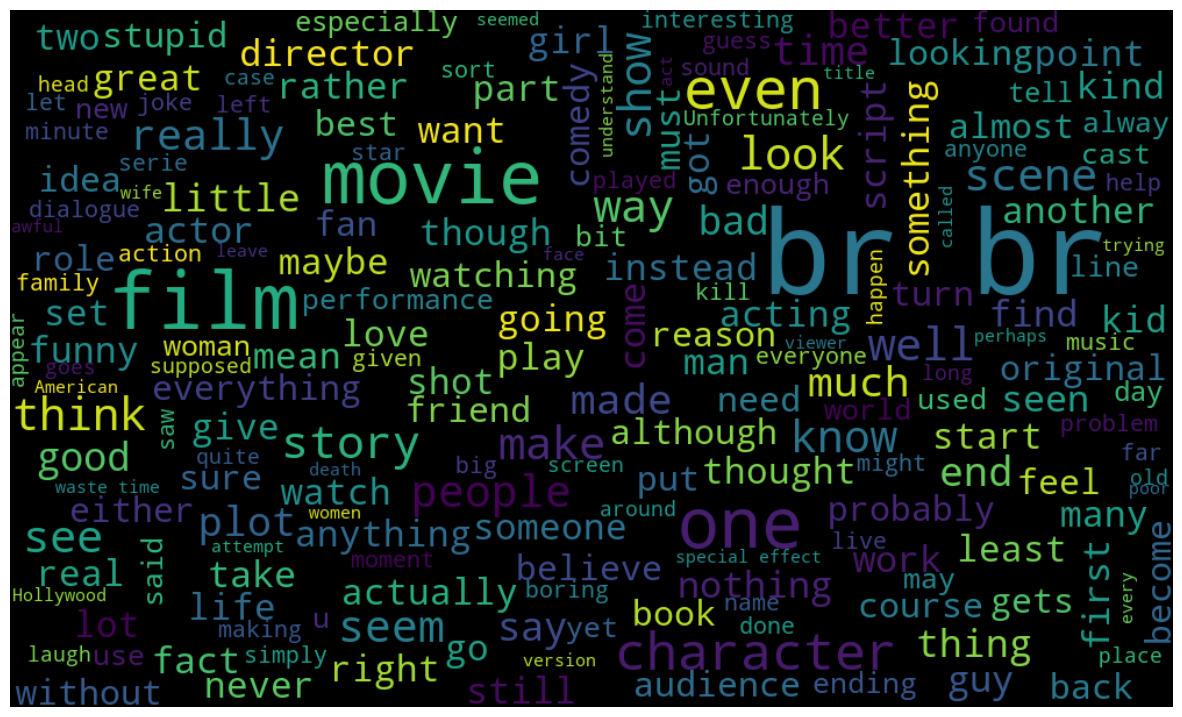

In [10]:
#wordcloud
from wordcloud import WordCloud

#draw wordcloud

reviews = ' '.join(word for word in data['review'][data['sentiment'] == 'negative'].astype(str))
wordcloud = WordCloud(height=600,width=1000, max_font_size=100)
plt.figure(figsize=(15,12))
plt.imshow(wordcloud.generate(reviews), interpolation='bilinear')
plt.axis('off')
plt.show()

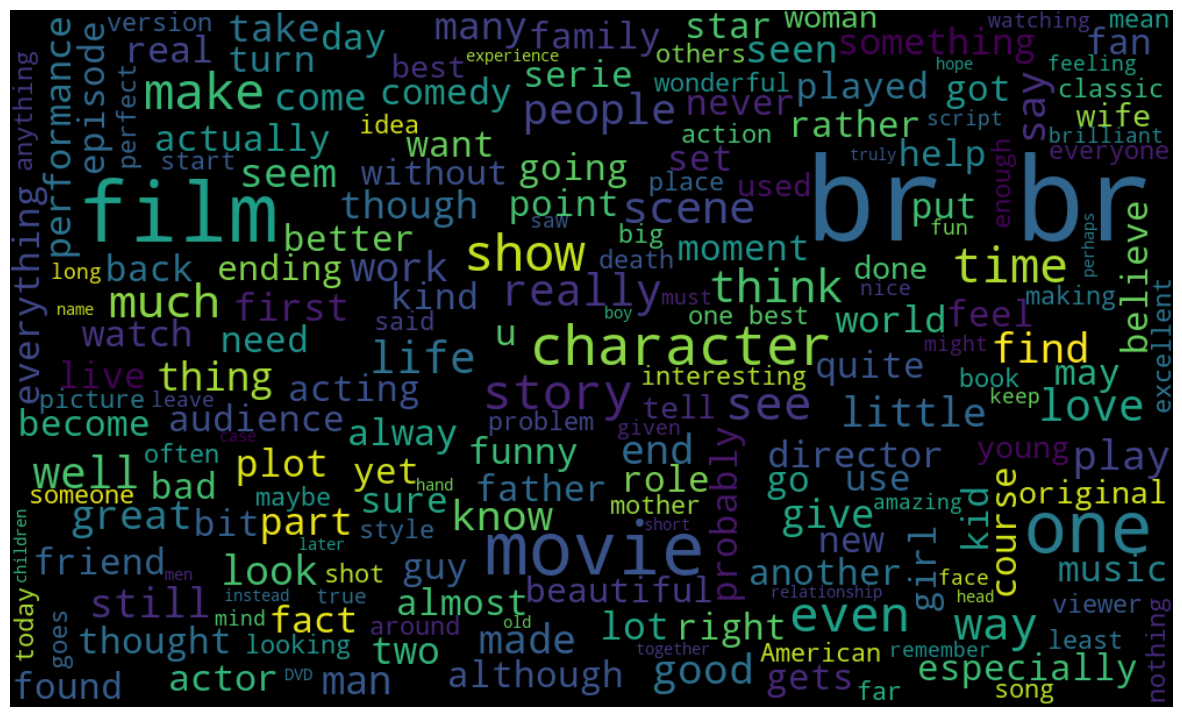

In [23]:
reviews = ' '.join(word for word in data['review'][data['sentiment'] == 'positive'].astype(str))
wordcloud = WordCloud(height=600,width=1000, max_font_size=100)
plt.figure(figsize=(15,12))
plt.imshow(wordcloud.generate(reviews), interpolation='bilinear')
plt.axis('off')
plt.show()

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(max_features=2500)

In [12]:
reviews = cv.fit_transform(data['review']).toarray()

In [13]:
data['sentiment'] = data['sentiment'].replace(['positive','negative'],[1,0])
data['sentiment'].value_counts()

C:\Users\Ael Cee\AppData\Local\Temp\ipykernel_5060\3880568743.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['sentiment'] = data['sentiment'].replace(['positive','negative'],[1,0])


sentiment
1    25000
0    25000
Name: count, dtype: int64

In [14]:
data

,review,sentiment
0,One reviewers mentioned watching 1 Oz episode ...,1
1,wonderful little production. <br /><br />The f...,1
2,thought wonderful way spend time hot summer we...,1
3,Basically there's family little boy (Jake) thi...,0
4,"Petter Mattei's ""Love Time Money"" visually stu...",1
...,...,...
49995,thought movie right good job. creative origina...,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0
49997,Catholic taught parochial elementary schools n...,0
49998,going disagree previous comment side Maltin on...,0


In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier

nb = MultinomialNB()
knn = KNeighborsClassifier()

In [25]:
from sklearn.linear_model import SGDClassifier, RidgeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier



In [26]:
sgd = SGDClassifier()
ridge = RidgeClassifier()
pa = PassiveAggressiveClassifier()

In [21]:
lr = LogisticRegression()

In [20]:
from sklearn.model_selection import train_test_split


In [22]:
reviews_train, reviews_test, sent_train, sent_test = train_test_split(reviews, data['sentiment'], test_size=0.2)

In [23]:
lr.fit(reviews_train,sent_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [24]:
nb.fit(reviews_train,sent_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [27]:
sgd.fit(reviews_train,sent_train)

,loss,'hinge'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


In [28]:
ridge.fit(reviews_train,sent_train)

,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,class_weight,None
,solver,'auto'
,positive,False
,random_state,None


In [29]:
pa.fit(reviews_train,sent_train)

,C,1.0
,fit_intercept,True
,max_iter,1000
,tol,0.001
,early_stopping,False
,validation_fraction,0.1
,n_iter_no_change,5
,shuffle,True
,verbose,0
,loss,'hinge'
,n_jobs,None


In [30]:
lr_predict = lr.predict(reviews_test)

In [31]:
nb_predict = nb.predict(reviews_test)

In [32]:
sgd_predict = sgd.predict(reviews_test)


In [33]:
ridge_predict = ridge.predict(reviews_test)


In [34]:
pa_predict = pa.predict(reviews_test)


**RESULTS IN CONFUSION MATRIX**

*Logistic Regression:*

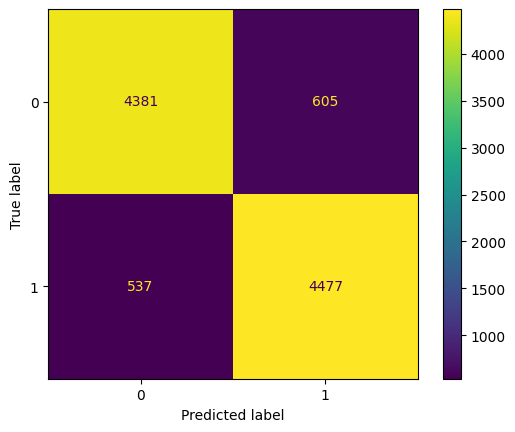

In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
lr_cm = confusion_matrix(sent_test, lr_predict,labels=lr.classes_)
display = ConfusionMatrixDisplay(confusion_matrix = lr_cm, display_labels=lr.classes_)
display.plot()
plt.show()

*Naive-Bayes:*

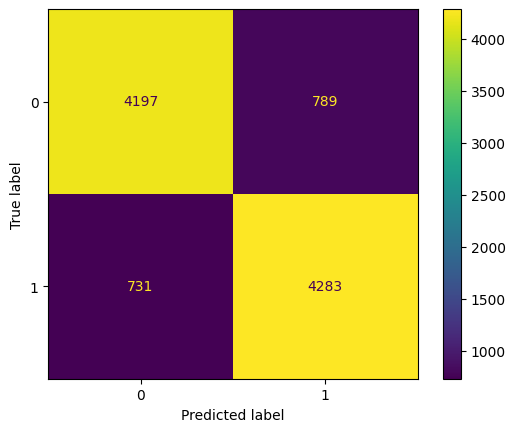

In [36]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
nb_cm = confusion_matrix(sent_test, nb_predict,labels=nb.classes_)
display = ConfusionMatrixDisplay(confusion_matrix = nb_cm, display_labels=nb.classes_)
display.plot()
plt.show()

*Stochastic Gradient Descent(SGD):*

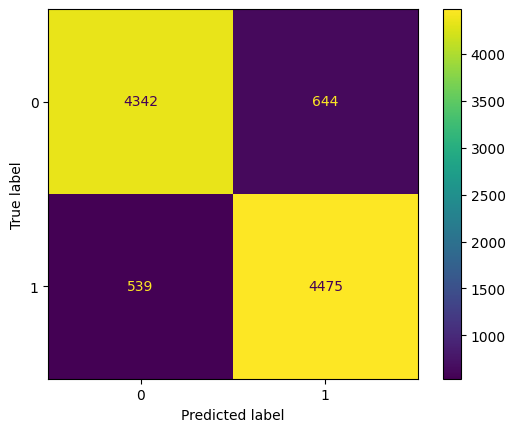

In [37]:
sgd_cm = confusion_matrix(sent_test, sgd_predict, labels=sgd.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=sgd_cm, display_labels=sgd.classes_)
display.plot()
plt.show()


*Ridge Regression:*

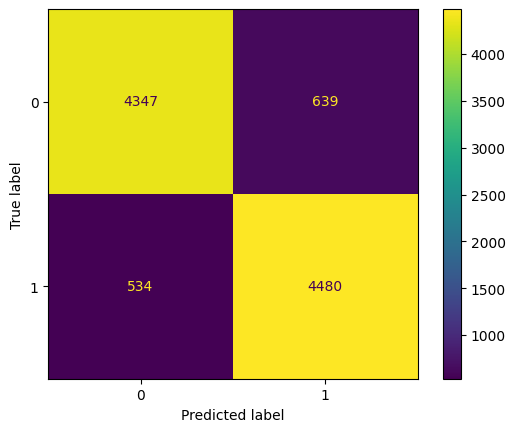

In [38]:
ridge_cm = confusion_matrix(sent_test, ridge_predict, labels=ridge.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=ridge_cm, display_labels=ridge.classes_)
display.plot()
plt.show()

*Passive Agressive:*

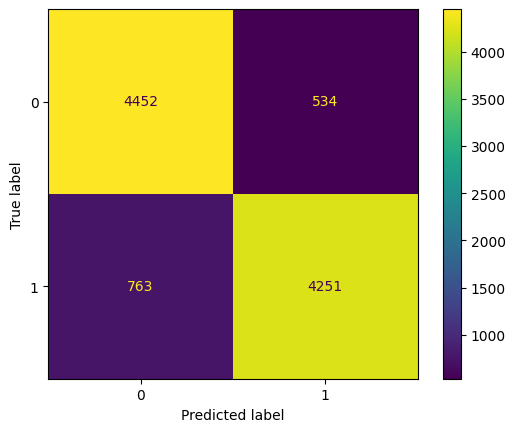

In [39]:
pa_cm = confusion_matrix(sent_test, pa_predict, labels=pa.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=pa_cm, display_labels=pa.classes_)
display.plot()
plt.show()

In [40]:
import pickle as pk

In [42]:
pk.dump(lr,open('LogisticRegression.pkl','wb'))
pk.dump(sgd, open('SGD.pkl', 'wb'))
pk.dump(ridge, open('RidgeRegression.pkl', 'wb'))
pk.dump(pa, open('PassiveAggressive.pkl', 'wb'))
pk.dump(nb, open('NaiveBayes.pkl', 'wb'))
